### Δεδομένα

Data Link: https://www.cryptodatadownload.com/data/binance/ 

Τα δεδομένα που χρησιμοποιούμε είναι από την πλατφόρμα της binance.

### Λίγες πληρφορίες για αυτά:

Περιέχουν τις πληροφορίες του bitcoin ανά λεπτό.


Επίσης η πληροφορία που μας ενδιαφέρει είναι το close του BTC. Το close είναι η τιμή που διαμορφόθηκε εκείνη τη στιγμή στο bitcoin. Το volume είναι η ποσότητα που αγοράστηκε/πουλήθηκε εκείνη τι στιγμή. 

'Αρα στην ουσία το close είναι η τιμή ενός BTC που συναλλάχθηκε εκέίνη τη στιγμή και το volume είναι η ποσότητα που συναλλάχθηκε.

Το open είναι η τιμή που άνοιξε στο bitcoin, το low είναι η χαμηλότερη τιμή πώλησης του ανοίγματος και το high η ηψυλότερη τιμή

# Εισάγουμε τις βιβλίοθηκες

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler
import random
import time
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
%matplotlib inline

In [2]:
# φορτώνουμε τα δεδομένα μας, στη συγκεκριμένη περίπτωση, διαβάζουμε τις πρώτες 10Κ γραμμές
# διότι διαφορετικά αργεί την όλη διαδικασία, ταυτόχρονα διαγράφουμε τις γραμμές που
# έχουν έστω μια null τιμή
btc_input_df  = pd.read_csv("btc_Oct_2015_to_Oct_2021.csv", parse_dates=["time"], nrows=1440)
btc_input_df.head()

,time,low,high,open,close,volume
0,2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
1,2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2,2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
3,2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
4,2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


In [3]:
# btc_input_df.sort_values(by=['time'], inplace=True)
btc_input_df = btc_input_df.set_index('time')
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


In [4]:
btc_input_df = btc_input_df.sort_index()
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-29 03:01:00,61649.50,61681.09,61649.50,61665.24,2.201539
2021-10-29 03:02:00,61603.45,61665.50,61665.24,61606.40,1.898041
2021-10-29 03:03:00,61593.32,61611.45,61605.16,61596.48,2.279936
2021-10-29 03:04:00,61546.11,61604.47,61596.47,61604.47,6.702590
2021-10-29 03:05:00,61601.65,61699.11,61601.69,61693.13,6.331365


In [5]:
print(btc_input_df.shape)
print("------------------------")
print(btc_input_df.info())

(1440, 5)
------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2021-10-29 03:01:00 to 2021-10-30 03:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   low     1440 non-null   float64
 1   high    1440 non-null   float64
 2   open    1440 non-null   float64
 3   close   1440 non-null   float64
 4   volume  1440 non-null   float64
dtypes: float64(5)
memory usage: 67.5 KB
None


In [6]:
print('Null Values:',btc_input_df.isnull().values.sum())
print('If any NA values:', btc_input_df.isnull().values.any())

Null Values: 0
If any NA values: False


In [7]:
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-29 03:01:00,61649.50,61681.09,61649.50,61665.24,2.201539
2021-10-29 03:02:00,61603.45,61665.50,61665.24,61606.40,1.898041
2021-10-29 03:03:00,61593.32,61611.45,61605.16,61596.48,2.279936
2021-10-29 03:04:00,61546.11,61604.47,61596.47,61604.47,6.702590
2021-10-29 03:05:00,61601.65,61699.11,61601.69,61693.13,6.331365


In [8]:
btc_input_df.tail()

,low,high,open,close,volume
time,,,,,
2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128
2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079


<AxesSubplot:title={'center':'Bitcoin Price'}, xlabel='time'>

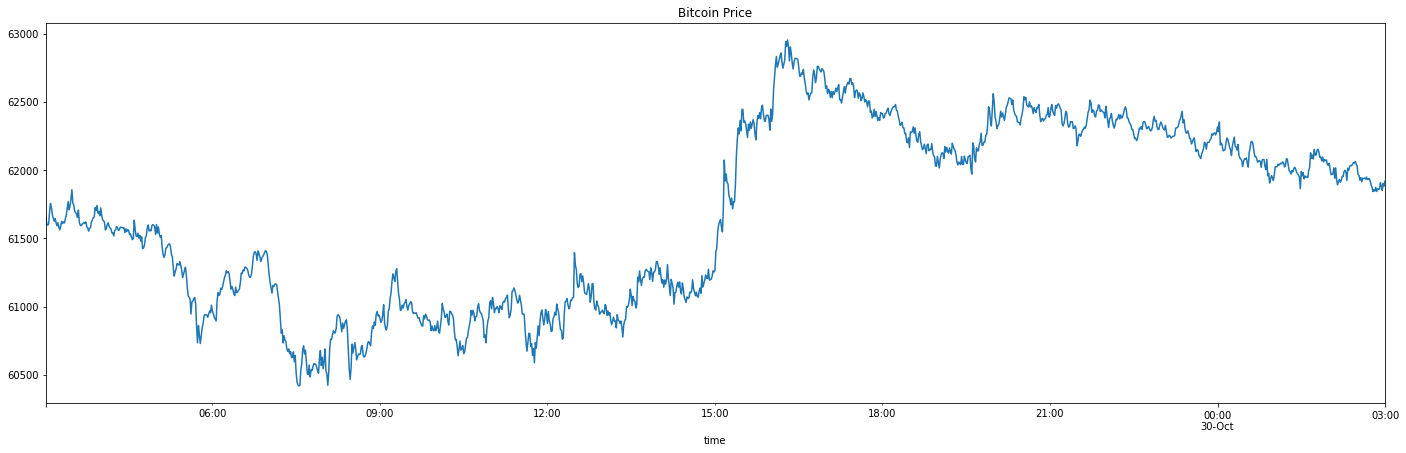

In [9]:
btc_input_df.close.plot(figsize=(24,7), title="Bitcoin Price")

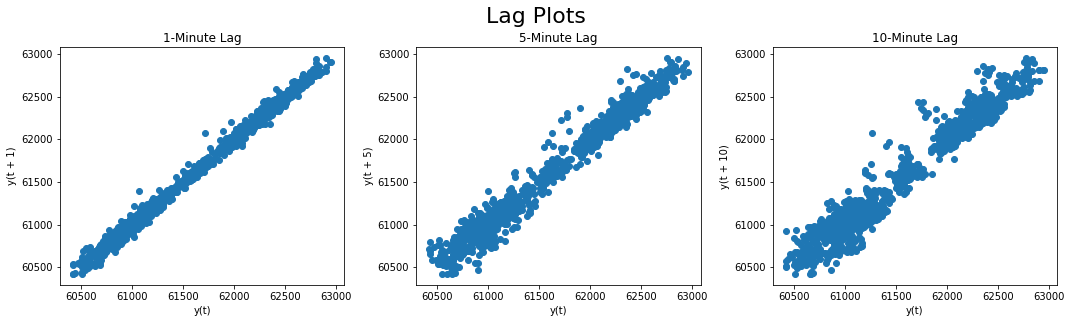

In [10]:
# κάνουμε plot το corelation 
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(btc_input_df['close'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(btc_input_df['close'], lag=5) 
plt.title('5-Minute Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(btc_input_df['close'], lag=10) 
plt.title('10-Minute Lag')

plt.tight_layout()

In [11]:
btc_closing_price = btc_input_df['close'].copy()
btc_closing_price.head()

time
2021-10-29 03:01:00    61665.24
2021-10-29 03:02:00    61606.40
2021-10-29 03:03:00    61596.48
2021-10-29 03:04:00    61604.47
2021-10-29 03:05:00    61693.13
Name: close, dtype: float64

In [12]:
type(btc_closing_price)

pandas.core.series.Series

In [13]:
df_train= btc_closing_price[:-200].copy()
df_test= btc_closing_price[-200:].copy()

In [14]:
df_test.shape

(200,)

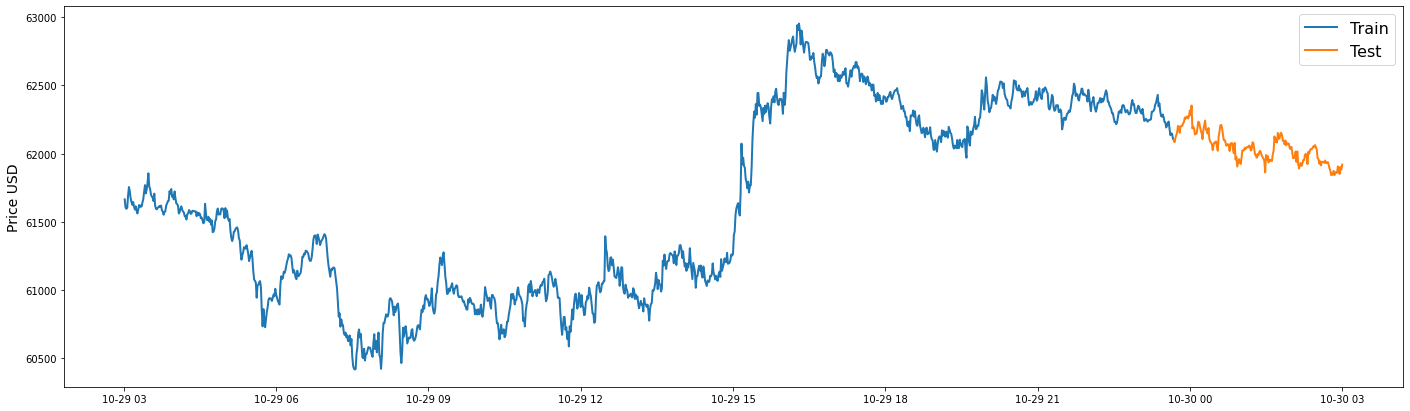

In [15]:
fig, ax = plt.subplots(1, figsize=(24, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [16]:
df_train= df_train.values.reshape(df_train.shape[0],1)
df_test= df_test.values.reshape(df_test.shape[0],1)

In [17]:
df_train.shape

(1240, 1)

In [18]:
df_train[0][0]

61665.24

In [19]:
"""
Ο λόγος που χωρίζουμε πρώτα τα δεδομένα μας και μετά τα κανονικοποιούμε
είναι διότι αν κάναμε το αντίθετο, όταν θα γινόταν το scaling, θα χρησιμοποιούνταν
(ως σημείο αναφοράς) τα δεδομένα που έχουμε ως training και αυτό θα επηρέαζε τα δεδομένα εκαπίδευσης.
Στην ουσία θα είχαμ "διαρροή" των αποτελεσμάτων του training set
"""

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [20]:
"""
Θα δημιουργήσουμε μια συνάρτηση που θα χωρίζει το datest σε input που θα δέχεται
το μοντέλο και τα label που πρέπει να προβλέπει.

Για παράδειγμα αν τα δεδομένα μας είχαν την μορφή [1, 2, 3, 4, 5, 6]
τότε τα input που θα παίρνει το μοντέλο μας και το αντίστοιχο output , θα ήταν κάπως έτσι:

Input | Output
1, 2      3
2, 3      4
3, 4      5
4, 5      6


Τα LSTMs δέχονται σαν είσοδο δεδομένα 2 διαστάσεων.
Η πρώτη διάσταση είναι ο αριθμός των χρονικών βημάτων, στο παράδειγμα μας είναι 2,
και η δεύτερη διάσταση είναι ο αριθμός των παρατηρήσεων ανά χρονικό βήμα, στο παράδειγμα είναι 1

"""
def dataset_generator_lstm(dataset, look_back=10):
    """
    Συνάρτηση που επιστρέφει όσα περιγράψαμε παραπάνω. Η παράμετρος
    look back προσδιορίζει πόσα προηγούμενα timesteps θα λάβουμε υπόψη
    για να προβλέψουμε το επόμενο timestep.
    Για παράδειγμα αν θέλουμε να προβλέψουμε τι θα γίνει την χρονική στιγμή t+1 (όπου t είναι η τωρινη
    χρονική στιγμή.) με look back ίσο με 10 , τότε θα χρησιμοποιουθούν τα δεδομένα της χρονική στιγμής
    t-9 , t-8, ... , t-1, t-0
    """    
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):
        
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)


trainX, trainY = dataset_generator_lstm(scaled_train)
testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testΧ: ", testX.shape)
print("testY", testY.shape)

trainX:  (1230, 10)
trainY:  (1230,)
testΧ:  (190, 10)
testY (190,)


Για το LSTM πρέπει να αναδιαμορφώσoyme την είσοδο ώστε να είναι ένας τρισδιάστατος πίνακας 
[δείγματα , χρονικά βήματα, χαρακτηριστικά]

Δείγματα (Samples): Είναι το len(trainX) , δηλαδή η ποσότητα των data points που έχουμε

Χαρακτηριστικά (Features): Η ποσότητα των χαρακτηριστικών σε κάθε timestep. Στην συγκεκριμένη περίπτωση το χαρακτηριστικό που έχουμε είναι η τιμή του bitcoin. 

Σημείωση: Σύμφωνα με το documentation του keras, το input πρέπει να είναι της μορφής 
[batch_size, timesteps, input_dim]. Ο αριθμός των timesteps είανι ίσος με τον αριθμό των LSTM cells. 

In [21]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (1230, 10, 1)
Shape of testX:  (190, 10, 1)


In [22]:
print("trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features) ", trainX.shape[1])
print("trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features) ", trainX.shape[2])

trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features)  10
trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features)  1


In [23]:
model = Sequential()

# model.add(LSTM(units = 32, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

model.add(LSTM(units = 64, activation = 'relu', return_sequences=False, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = f'./models/best_model_{int(time.time())}.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]


history = model.fit(trainX, trainY, batch_size = 64, epochs = 100, verbose=1, shuffle=False, validation_split=0.2, callbacks=callbacks)

Epoch 1/100
15/16 [===========================>..] - ETA: 0s - loss: 0.1602
Epoch 00001: val_loss improved from inf to 0.30272, saving model to ./models\best_model_1646469390.hdf5
16/16 [==============================] - 2s 40ms/step - loss: 0.1621 - val_loss: 0.3027
Epoch 2/100
15/16 [===========================>..] - ETA: 0s - loss: 0.0497
Epoch 00002: val_loss improved from 0.30272 to 0.04974, saving model to ./models\best_model_1646469390.hdf5
16/16 [==============================] - 0s 20ms/step - loss: 0.0496 - val_loss: 0.0497
Epoch 3/100
13/16 [=======================>......] - ETA: 0s - loss: 0.0130
Epoch 00003: val_loss improved from 0.04974 to 0.00114, saving model to ./models\best_model_1646469390.hdf5
16/16 [==============================] - 0s 22ms/step - loss: 0.0131 - val_loss: 0.0011
Epoch 4/100
13/16 [=======================>......] - ETA: 0s - loss: 0.0148
Epoch 00004: val_loss did not improve from 0.00114
16/16 [==============================] - 0s 18ms/step - loss:

In [25]:
model_from_saved_checkpoint = load_model(checkpoint_path)

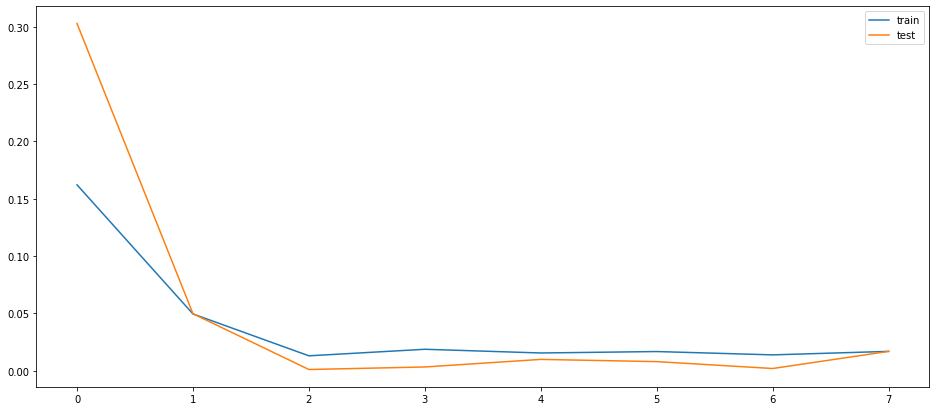

In [26]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [27]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις

predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(testX.shape[0], 1))

test_actual = scaler_test.inverse_transform(testY.reshape(testX.shape[0], 1))

def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

print(f"Mean Absolute Error: {mean_absolute_error(predicted_btc_price_test_data, test_actual)}")
print(f"Mean Square Error: {mean_squared_error(predicted_btc_price_test_data, test_actual)}")
print(f"r2 score: {r2_score(predicted_btc_price_test_data, test_actual)}")
print(f"Root Mean Square Error: {rmse(predicted_btc_price_test_data, test_actual)}")

Mean Absolute Error: 54.0624004934209
Mean Square Error: 4040.691074984696
r2 score: 0.35113724990766215
Root Mean Square Error: 63.566430409333954


In [28]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις

predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)

predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(trainX.shape[0], 1))

train_actual = scaler_train.inverse_transform(trainY.reshape(trainY.shape[0], 1))

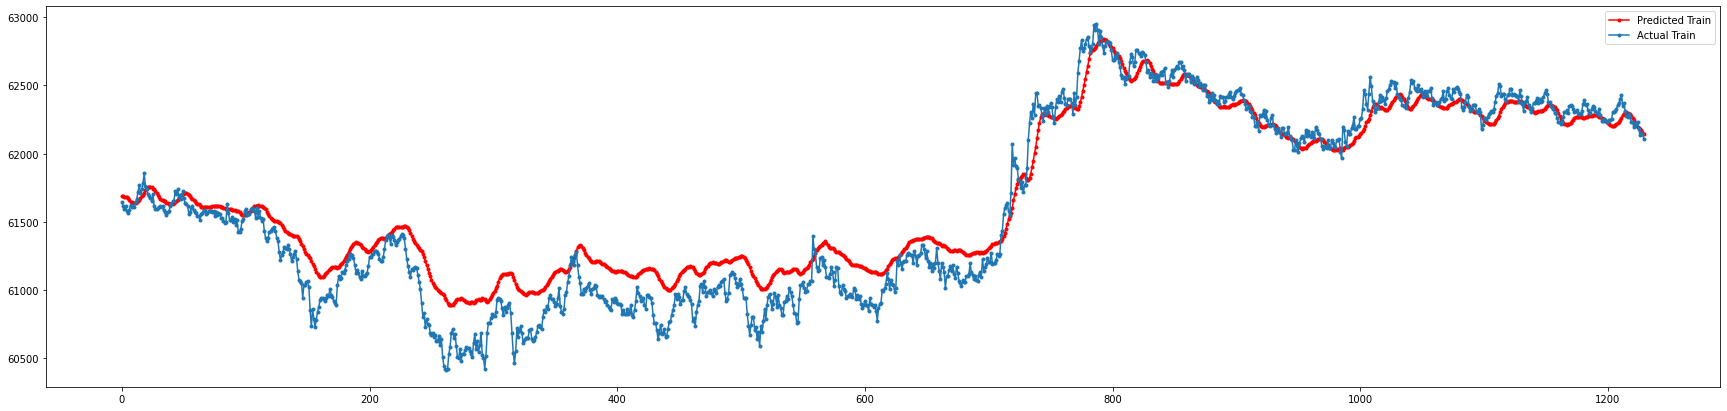

In [29]:
plt.figure(figsize=(30,7))

plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')

plt.legend()
plt.show()

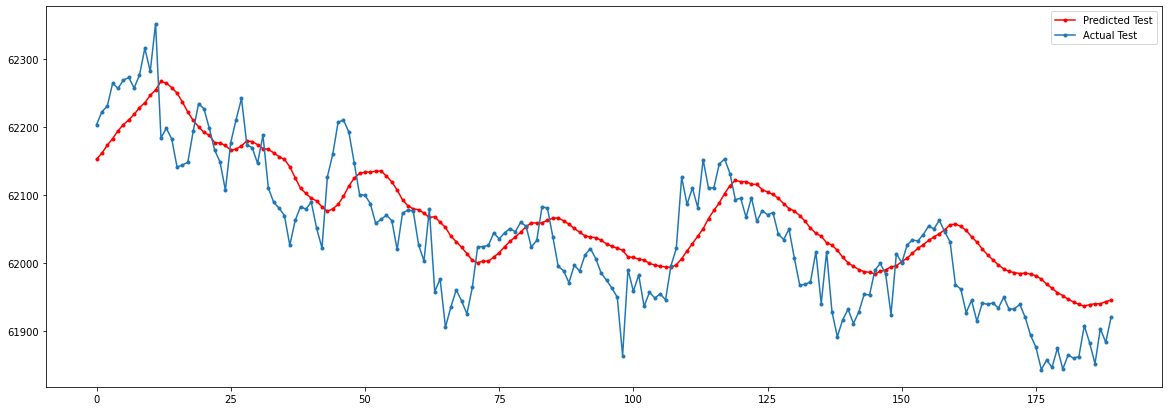

In [30]:
plt.figure(figsize=(20,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

In [31]:
df_strategy_actual = pd.DataFrame(test_actual)
df_strategy_predicted = pd.DataFrame(predicted_btc_price_test_data)

df_strategy_actual = df_strategy_actual.rename(columns={0: "close"})
df_strategy_predicted = df_strategy_predicted.rename(columns={0: "close"})

In [32]:
df_strategy_actual.head()

,close
0,62203.73
1,62222.69
2,62231.10
3,62264.69
4,62257.02


In [33]:
df_strategy_predicted.head()

,close
0,62152.828125
1,62161.746094
2,62173.285156
3,62183.160156
4,62194.707031


In [34]:
def classify(current, future):
    if future is None:
        return
    """
    Επιστρέφει 1 αν η τιμή στο μέλλον είναι αυξημένη ή
    0 αν η τιμή στο μέλλον είναι μειωμένη
    """
    if float(future) > float(current):
        return 1
    else:
        return 0

In [35]:
df_strategy_actual['future'] = df_strategy_actual["close"].shift(-1)

df_strategy_predicted['future'] = df_strategy_predicted["close"].shift(-1)

df_strategy_actual['target'] = list(map(classify, df_strategy_actual["close"], df_strategy_actual["future"]))

df_strategy_predicted['target'] = list(map(classify, df_strategy_predicted["close"], df_strategy_predicted["future"]))

frames = [df_strategy_actual, df_strategy_predicted]

result = pd.concat(frames, axis=1, ignore_index=True)

result = result.rename(columns={0: "actual_close", 
                                1:"actual_future_close", 
                                2:"actual_target",
                                3:"predicted_close",
                                4:"predicted_future_close",
                                5:"predicted_target"})

result.head()

,actual_close,actual_future_close,actual_target,predicted_close,predicted_future_close,predicted_target
0,62203.73,62222.69,1,62152.828125,62161.746094,1
1,62222.69,62231.10,1,62161.746094,62173.285156,1
2,62231.10,62264.69,1,62173.285156,62183.160156,1
3,62264.69,62257.02,0,62183.160156,62194.707031,1
4,62257.02,62269.35,1,62194.707031,62203.800781,1


In [36]:
result.drop(['actual_future_close', 'predicted_future_close'], axis=1, inplace=True)
result.head()

,actual_close,actual_target,predicted_close,predicted_target
0,62203.73,1,62152.828125,1
1,62222.69,1,62161.746094,1
2,62231.10,1,62173.285156,1
3,62264.69,0,62183.160156,1
4,62257.02,1,62194.707031,1


In [37]:
result

,actual_close,actual_target,predicted_close,predicted_target
0,62203.73,1,62152.828125,1
1,62222.69,1,62161.746094,1
2,62231.10,1,62173.285156,1
3,62264.69,0,62183.160156,1
4,62257.02,1,62194.707031,1
...,...,...,...,...
185,61882.28,0,61938.472656,1
186,61851.39,1,61939.683594,1
187,61903.15,0,61939.726562,1
188,61882.74,1,61942.957031,1


In [38]:
def trade(df, usd=100):
    cnt = 0
    btc = 0
    percentage_buy = 0.2
    percentage_sell = 0.2
    profit = 0
    
    for index, target in enumerate(result['predicted_target']):
        # αν μας τελείωσαν όλα, τελειώνει ο αλγόριθμος
        if usd == 0 and btc == 0:
            return 0
        
        # αγοράζουμε
        if target == 1 and usd > 10:
            buy = percentage_buy * usd
            btc = buy / df['actual_close'][index] + btc
            usd = usd - buy
            # print(f'{cnt} --------------------------------------------------------------------')
            # print(f"You have spent {buy} dollars Total: {btc} btc")
            # print('-------------------------------------------------------------')
            cnt += 1


        # πουλάμε 
        if target == 0 and btc > 0:
            sell = btc * percentage_sell 
            usd = sell * df['actual_close'][index] + usd
            btc = btc - sell
            # print(f'{cnt} --------------------------------------------------------------------')           
            # print(f"Real: You get: {sell} usd Total: {usd} usd")
            # print("--------------------------------------------")
            cnt += 1
    
    # print("-------------- END ----------------")
    print(f"USD: {usd}, BTC:{format(float(btc), 'f')} -> {btc * df.iloc[-1,0]} usd\n\nTotal: {usd + df.iloc[-1,0] * btc} usd")  
    return usd, btc

In [39]:
usd, btc = trade(result)

USD: 45.41720757575541, BTC:0.000874 -> 54.09040001765042 usd

Total: 99.50760759340582 usd


In [40]:
testX.shape[0] 

190

In [41]:
# για να προβλέψουμε την τιμή της επ΄όμενης μέρας που δεν έχουμε στα δεδομένα μας, θα πρέπει να
# περάσουμε στο μον΄τέλο μας τις look_back μέρες και θα πάρουμε σαν output την επόμενη μέρα
# Όμοια για να πάρουμε την επόμενη μέρα από την αυριανή μέρα, θα δώσουμε σαν input στο μοντέλο μας
# τα δεδομένα των lookback - 1 μερών για να πάρουμε σαν output την μεθαυριανή μέρα
lookback_period = 15
testX_last_days = testX[testX.shape[0] - lookback_period:]
testX_last_days.shape

(15, 10, 1)

In [42]:
predicted_days_forecast_price_test_x = []

for i in range(lookback_period):  
    predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_days[i:i+1])
  
    predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
    predicted_days_forecast_price_test_x.append(predicted_forecast_price_test_x)

In [43]:
predicted_days_forecast_price_test_x = np.array(predicted_days_forecast_price_test_x)

predicted_days_forecast_price_test_x.shape

(15, 1, 1)

In [44]:
predicted_btc_price_test_data.shape

(190, 1)

In [45]:
predicted_days_forecast_price_test_x = predicted_days_forecast_price_test_x.flatten()

predicted_btc_price_test_data = predicted_btc_price_test_data.flatten()

In [46]:
predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_days_forecast_price_test_x))

predicted_btc_test_concatenated.shape

(205,)

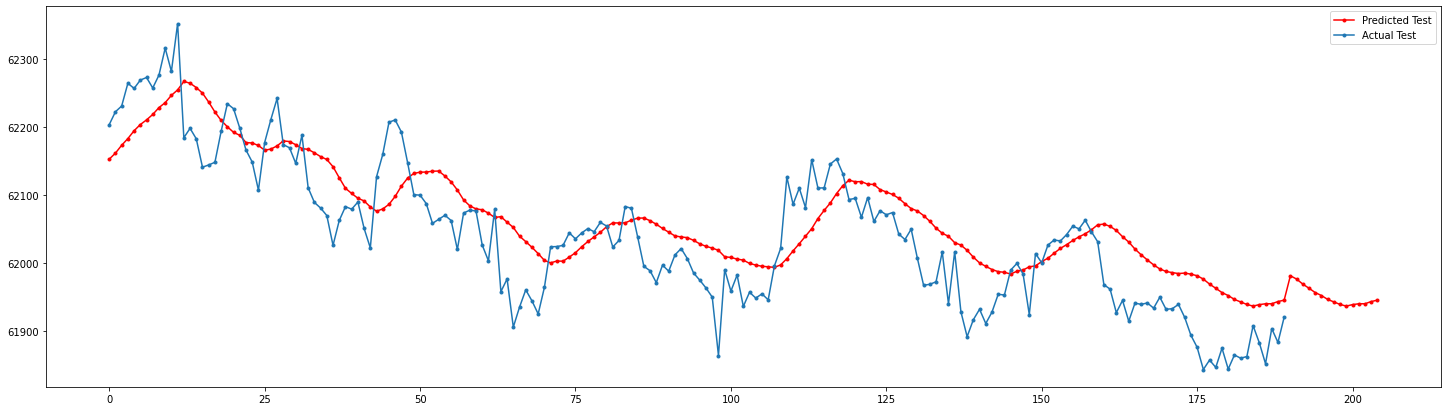

In [47]:
plt.figure(figsize=(25,7))

plt.plot(predicted_btc_test_concatenated, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()

plt.show()

In [48]:
def sharpe_ratio(rets):
    return rets.mean() / rets.std()

def positions(x, theta):
    """
    Επιστρέφει μια τιμή ανάμεσα στο -1 και 1. Η
    τιμή αυτή αντιπροσωπεύει το ποσοστό που πρέπει να πουλήοσυμε
    ή να αγοράσουμε από το διαθέσιμο χαρτοφυλάκιο μας.
    """
    M = len(theta) - 2
    T = len(x)
    Ft = np.zeros(T)
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t - 1]]])
        Ft[t] = np.tanh(np.dot(theta, xt))
    return Ft

def returns(Ft, x, delta=0):
    T = len(x)
    rets = Ft[0:T - 1] * x[1:T] - delta * np.abs(Ft[1:T] - Ft[0:T - 1])
    return np.concatenate([[0], rets])

def gradient(x, theta, delta):
    Ft = positions(x, theta)
    R = returns(Ft, x, delta)
    T = len(x)
    M = len(theta) - 2
    
    A = np.mean(R)
    B = np.mean(np.square(R))
    S = A / np.sqrt(B - A ** 2)

    dSdA = S * (1 + S ** 2) / A
    dSdB = -S ** 3 / 2 / A ** 2
    dAdR = 1. / T
    dBdR = 2. / T * R
    
    grad = np.zeros(M + 2)  
    dFpdtheta = np.zeros(M + 2)  
    
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t-1]]])
        dRdF = -delta * np.sign(Ft[t] - Ft[t-1])
        dRdFp = x[t] + delta * np.sign(Ft[t] - Ft[t-1])
        dFdtheta = (1 - Ft[t] ** 2) * (xt + theta[-1] * dFpdtheta)
        dSdtheta = (dSdA * dAdR + dSdB * dBdR[t]) * (dRdF * dFdtheta + dRdFp * dFpdtheta)
        grad = grad + dSdtheta
        dFpdtheta = dFdtheta

        
    return grad, S

def train(x, epochs=2000, M=8, commission=0.0025, learning_rate = 0.3):
    theta = np.random.rand(M + 2)
    sharpes = np.zeros(epochs) 
    for i in range(epochs):
        grad, sharpe = gradient(x, theta, commission)
        theta = theta + grad * learning_rate

        sharpes[i] = sharpe
    
    
    print("finished training")
    return theta, sharpes

In [49]:
rets = btc_input_df['close'].copy().diff()[1:1000]

x = np.array(rets)

N = 900 
P = 100
x_train = x[:N]
x_test = x[-P:]

std = np.std(x_train)
mean = np.mean(x_train)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [50]:
rets.head()

time
2021-10-29 03:02:00   -58.84
2021-10-29 03:03:00    -9.92
2021-10-29 03:04:00     7.99
2021-10-29 03:05:00    88.66
2021-10-29 03:06:00    62.83
Name: close, dtype: float64

In [51]:
%%time
np.random.seed(0)
print('start training')
theta, sharpes = train(x_train, epochs=100, M=10, commission=0, learning_rate=0.3)

start training
finished training
CPU times: total: 3.28 s
Wall time: 3.29 s


Sharpe ratio: 0.0630478378893852


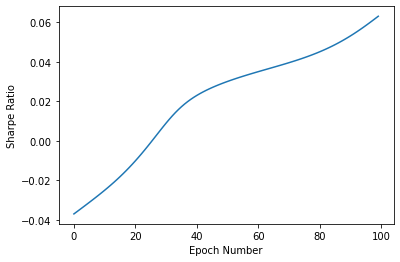

In [52]:
plt.plot(sharpes)
plt.xlabel('Epoch Number')
plt.ylabel('Sharpe Ratio')
print(f"Sharpe ratio: {sharpes[-1]}")

In [53]:
test_returns = returns(positions(x_test, theta), x_test)

print(f"Mean Absolute Error: {mean_absolute_error(x_test.cumsum(), test_returns.cumsum())}")
print(f"Mean Squared Error: {mean_squared_error(x_test.cumsum(), test_returns.cumsum())}")
print(f"r2 score: {r2_score(x_test.cumsum(), test_returns.cumsum())}")
print(f"Root Mean Square Error: {rmse(x_test.cumsum(), test_returns.cumsum())}")

Mean Absolute Error: 5.260343177712723
Mean Squared Error: 36.01927323670995
r2 score: -3.7484277951353313
Root Mean Square Error: 6.001605888152766


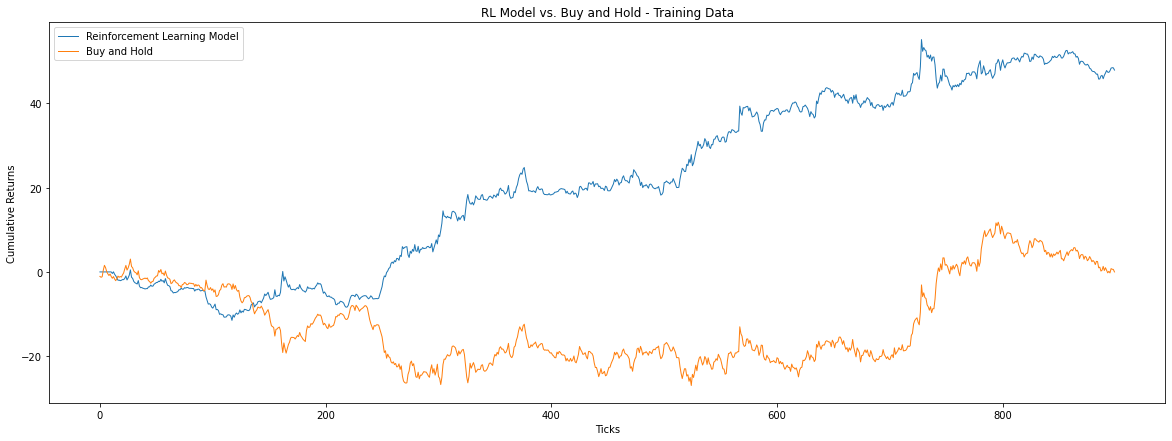

In [54]:
train_returns = returns(positions(x_train, theta), x_train)
plt.figure(figsize=(20,7))
plt.plot((train_returns).cumsum(), label="Reinforcement Learning Model", linewidth=1)
plt.plot((x_train).cumsum(), label="Buy and Hold", linewidth=1)
plt.xlabel('Ticks')
plt.ylabel('Cumulative Returns');
plt.legend()
plt.title("RL Model vs. Buy and Hold - Training Data");

Text(0.5, 1.0, 'RL Model vs. Buy and Hold - Test Data')

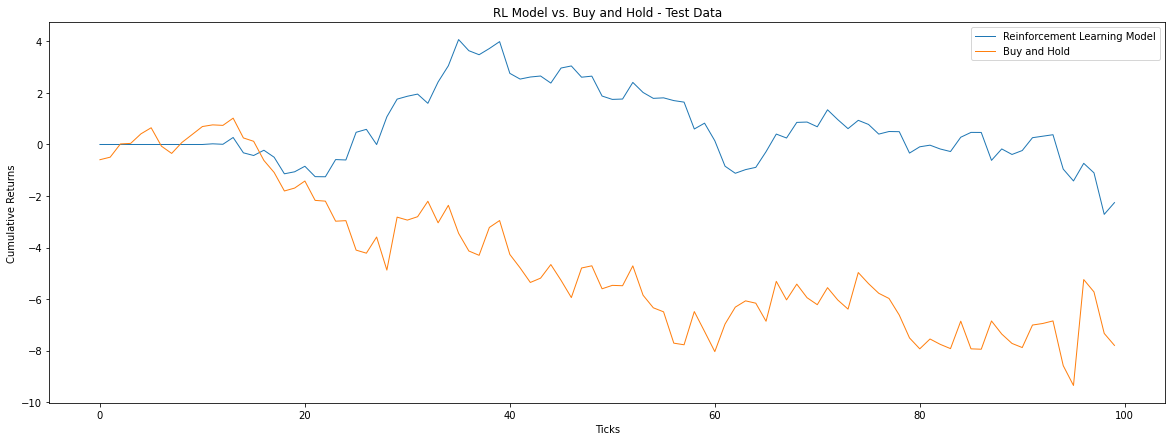

In [55]:
plt.figure(figsize=(20,7))
plt.plot((test_returns).cumsum(), label="Reinforcement Learning Model", linewidth=1)
plt.plot((x_test).cumsum(), label="Buy and Hold", linewidth=1)
plt.xlabel('Ticks')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title("RL Model vs. Buy and Hold - Test Data")

In [56]:
test_returns.cumsum()[:100]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.61614453e-02,
        8.05545883e-03,  2.72111684e-01, -3.23462264e-01, -4.27212235e-01,
       -2.23197471e-01, -4.94599266e-01, -1.13790260e+00, -1.05978668e+00,
       -8.45232367e-01, -1.24830474e+00, -1.25281861e+00, -5.85418685e-01,
       -6.01109669e-01,  4.73358892e-01,  5.88075251e-01, -2.91643904e-03,
        1.07508585e+00,  1.76109375e+00,  1.87269440e+00,  1.95690458e+00,
        1.59850995e+00,  2.42732634e+00,  3.05679675e+00,  4.07315468e+00,
        3.64104758e+00,  3.48526121e+00,  3.72534204e+00,  3.99365301e+00,
        2.76172033e+00,  2.53949089e+00,  2.61994483e+00,  2.65848530e+00,
        2.38464845e+00,  2.96865509e+00,  3.04906681e+00,  2.61228795e+00,
        2.65336881e+00,  1.88079626e+00,  1.75062460e+00,  1.76448904e+00,
        2.41037870e+00,  

In [57]:
def trading_rrl(df, usd=100):
    cnt = 0
    btc = 0
    percentage_buy = 0.2
    percentage_sell = 0.2
    profit = 0
    
    for index, target in enumerate(test_returns.cumsum()):
        # αν μας τελείωσαν όλα, τελειώνει ο αλγόριθμος
        if usd == 0 and btc == 0:
            return (0,0)
        
        if target == 0:
            # print(f'{cnt} --------------------------------------------------------------------')
            # print(f"Nothing")
            # print('-------------------------------------------------------------')
            cnt += 1
            
        # αγοράζουμε
        if target > 0 and usd > 10:
            buy = percentage_buy * usd
            # print(buy)
            btc = buy / df['actual_close'][index] + btc
            # print(df['actual_close'][index])
            usd = usd - buy
            # print(f'{cnt} --------------------------------------------------------------------')
            # print(f"You have spent {buy} usd Total: {format(float(btc), 'f')} btc")
            # print('-------------------------------------------------------------')
            cnt += 1


        # πουλάμε 
        if target < 0 and btc > 0:
            sell = btc * percentage_sell 
            usd = (sell * df['actual_close'][index]) + usd
            btc = btc - sell
            # print(f'{cnt} --------------------------------------------------------------------')           
            # print(f"You get: {sell} usd Total: {usd} usd")
            # print("--------------------------------------------")
            cnt += 1
    
    # print("-------------- END ----------------")
    print(f"USD: {usd}, BTC:{format(float(btc), 'f')} -> {btc * df.iloc[-1,0]}\n\nTotal: {usd + df['actual_close'].values[-1] * btc} usd")
    return usd, btc

In [58]:
usd, btc = trading_rrl(result.copy())

USD: 83.451429443318, BTC:0.000262 -> 16.247494254432343

Total: 99.69892369775035 usd
